In [ ]:
Somente um hiperplano não serve para separar os dados pois o hiperplano é uma reta, e os dados não estão linearmente separáveis. Dessa forma,o uso de um kernel nao linear é mais adequado para classificar os dados.

       Modelo  Accuracy  Precision (macro avg)  Recall (macro avg)  \
0  SVM Linear    0.9000                 0.8988              0.8957   
1     SVM RBF    0.9333                 0.9300              0.9352   

   F1-score (macro avg)  
0                0.8971  
1                0.9321  


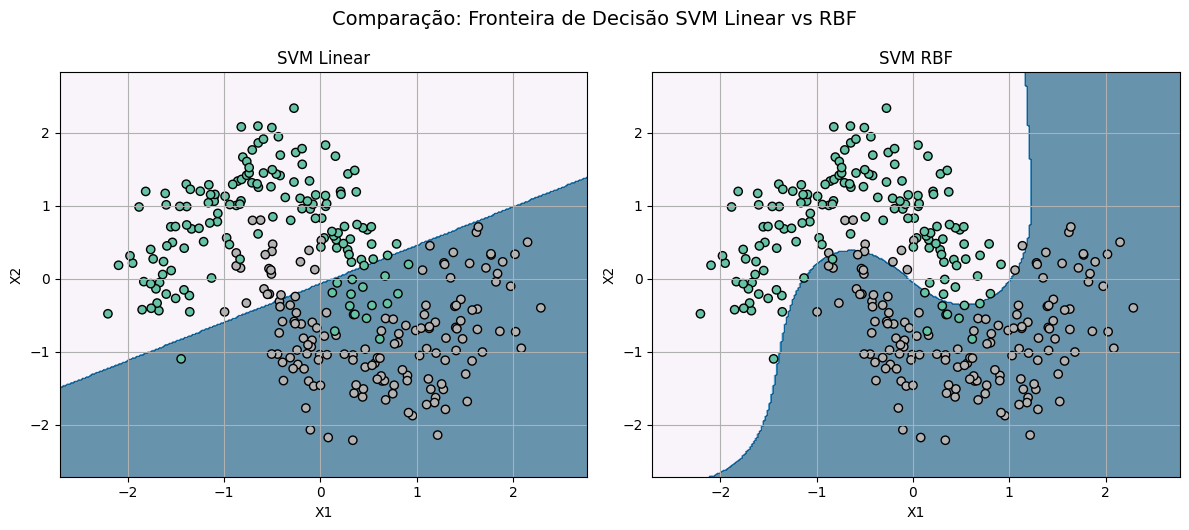

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

models = {
    "SVM Linear": SVC(kernel="linear", C=1),
    "SVM RBF": SVC(kernel="rbf", C=1, gamma='scale')
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    results.append({
        "Modelo": name,
        "Accuracy": round(accuracy, 4),
        "Precision (macro avg)": round(report['macro avg']['precision'], 4),
        "Recall (macro avg)": round(report['macro avg']['recall'], 4),
        "F1-score (macro avg)": round(report['macro avg']['f1-score'], 4)
    })

df_results = pd.DataFrame(results)
print(df_results)


def plot_decision_boundary(model, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.PuBu, alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set2, edgecolors='k')
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.grid(True)

plt.figure(figsize=(12, 5))

for i, (name, model) in enumerate(models.items()):
    plt.subplot(1, 2, i + 1)
    plot_decision_boundary(model, X_scaled, y, title=name)

plt.tight_layout()
plt.suptitle("Comparação: Fronteira de Decisão SVM Linear vs RBF", fontsize=14, y=1.05)
plt.show()
